# 1. Demo on J-LORAKS versus J-LORAKS + Joint VS-Net  

In [2]:
import scipy.io as io
import numpy as np
import torch
from JVS_net_v2 import *
device = 'cuda:0' # Device number for GPU

In [3]:
h = io.loadmat('JLORAKS.mat')
print(h.keys())

dict_keys(['true', '__globals__', 'mask_6', 'mask_10', 'Xk_6', 'Sens', '__header__', 'Xk_8', 'JL_4', 'mask_4', '__version__', 'Xk_4', 'JL_8', 'mask_8', 'JL_6', 'JL_10', 'Xk_10'])


**Description of the dataset(h) **
- JL_4 (6,8,10) : JLORAKS result of R = 4 (6,8,10) 
- Xk_4 (6,8,10) : acquired k-space of R = 4 (6,8,10)
- mask_4 (6,8,10) : acquired k-space mask of R=4 (6,8,10)
- Sens : Sensitivity maps
- true : fully sampled result (image domain)

**Loading the trained network architecture **

In [4]:
net = network(alfa=None, beta=0.5, cascades = 8)
net = net.to(device)
net.load_state_dict(torch.load('Weights_LORAKS'))

## 1-1 Result of R=8

In [36]:
im0, true, Sens, X_k, mask = torch.from_numpy(h['JL_8']),\
h['true'],torch.from_numpy(h['Sens']),\
torch.from_numpy(h['Xk_8']),torch.from_numpy(h['mask_8'])

JL_im = h['JL_8'] # JLORAKS output

_im0, _Sens, _X_k, _mask = im0.unsqueeze(0).to(device), Sens.unsqueeze(0).to(device),\
X_k.unsqueeze(0).to(device), mask.unsqueeze(0).to(device)

with torch.no_grad():
    out = net(_im0,_X_k,_mask,_Sens)
    out = out.detach().cpu().numpy()

JL_im = np.squeeze(JL_im[...,0] + 1j * true[...,1])
JL_im = np.transpose(JL_im,(1,2,0))
JL_im = JL_im.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order    
    
out = np.squeeze(out[...,0] + 1j * out[...,1])
out = np.transpose(out,(1,2,0))
out = out.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order

true = np.squeeze(true[...,0] + 1j * true[...,1])
true = np.transpose(true,(1,2,0))
true = true.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order


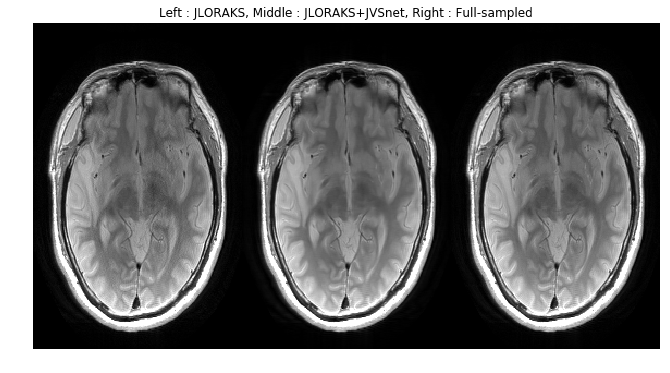

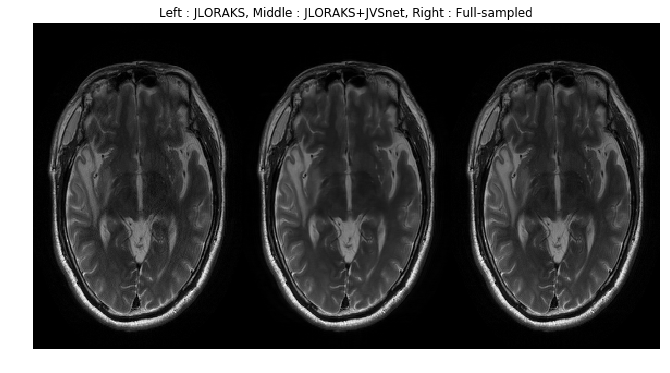

In [41]:
cat_im1 = np.concatenate((JL_im[:,:,0,0],out[:,:,0,0],true[:,:,0,0]),axis=1) # 1st TD, 1st TE result
cat_im2 = np.concatenate((JL_im[:,:,2,0],out[:,:,2,0],true[:,:,2,0]),axis=1) # 3rd TD, 1st TE result

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.imshow(np.abs(cat_im1),cmap='gray',vmax=1.2)
plt.axis('off')
plt.title('Left : JLORAKS, Middle : JLORAKS+JVSnet, Right : Full-sampled')

plt.figure(figsize=(14,6))
plt.imshow(np.abs(cat_im2),cmap='gray',vmax=1.2)
plt.axis('off')
plt.title('Left : JLORAKS, Middle : JLORAKS+JVSnet, Right : Full-sampled')


## 1-1 Result of varying R (4,6,8,10)

In [44]:
im0, true, Sens, X_k, mask = torch.from_numpy(h['JL_4']),\
h['true'],torch.from_numpy(h['Sens']),\
torch.from_numpy(h['Xk_4']),torch.from_numpy(h['mask_4'])

_im0, _Sens, _X_k, _mask = im0.unsqueeze(0).to(device), Sens.unsqueeze(0).to(device),\
X_k.unsqueeze(0).to(device), mask.unsqueeze(0).to(device)

with torch.no_grad():
    out4 = net(_im0,_X_k,_mask,_Sens)
    out4 = out4.detach().cpu().numpy()

im0, true, Sens, X_k, mask = torch.from_numpy(h['JL_6']),\
h['true'],torch.from_numpy(h['Sens']),\
torch.from_numpy(h['Xk_6']),torch.from_numpy(h['mask_6'])

_im0, _Sens, _X_k, _mask = im0.unsqueeze(0).to(device), Sens.unsqueeze(0).to(device),\
X_k.unsqueeze(0).to(device), mask.unsqueeze(0).to(device)

with torch.no_grad():
    out6 = net(_im0,_X_k,_mask,_Sens)
    out6 = out6.detach().cpu().numpy()

im0, true, Sens, X_k, mask = torch.from_numpy(h['JL_8']),\
h['true'],torch.from_numpy(h['Sens']),\
torch.from_numpy(h['Xk_8']),torch.from_numpy(h['mask_8'])

_im0, _Sens, _X_k, _mask = im0.unsqueeze(0).to(device), Sens.unsqueeze(0).to(device),\
X_k.unsqueeze(0).to(device), mask.unsqueeze(0).to(device)

with torch.no_grad():
    out8 = net(_im0,_X_k,_mask,_Sens)
    out8 = out8.detach().cpu().numpy()

im0, true, Sens, X_k, mask = torch.from_numpy(h['JL_10']),\
h['true'],torch.from_numpy(h['Sens']),\
torch.from_numpy(h['Xk_10']),torch.from_numpy(h['mask_10'])

_im0, _Sens, _X_k, _mask = im0.unsqueeze(0).to(device), Sens.unsqueeze(0).to(device),\
X_k.unsqueeze(0).to(device), mask.unsqueeze(0).to(device)

with torch.no_grad():
    out10 = net(_im0,_X_k,_mask,_Sens)
    out10 = out10.detach().cpu().numpy()
    
out4 = np.squeeze(out4[...,0] + 1j * out4[...,1])
out4 = np.transpose(out4,(1,2,0))
out4 = out4.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order

out6 = np.squeeze(out6[...,0] + 1j * out6[...,1])
out6 = np.transpose(out6,(1,2,0))
out6 = out6.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order

out8 = np.squeeze(out8[...,0] + 1j * out8[...,1])
out8 = np.transpose(out8,(1,2,0))
out8 = out8.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order

out10 = np.squeeze(out10[...,0] + 1j * out10[...,1])
out10 = np.transpose(out10,(1,2,0))
out10 = out10.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order

true = np.squeeze(true[...,0] + 1j * true[...,1])
true = np.transpose(true,(1,2,0))
true = true.reshape((300,192,4,2)) # change to xRes,yRes,TD,TE order



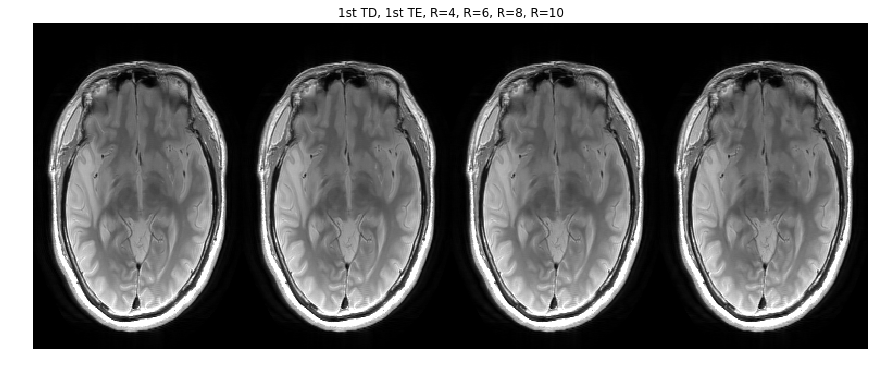

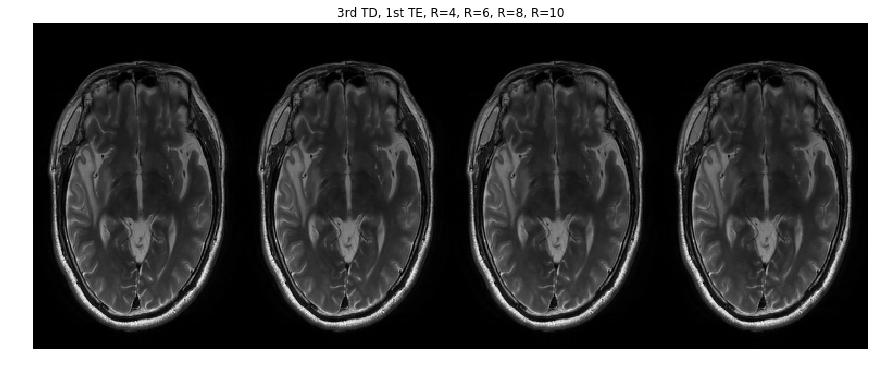

In [47]:
cat_im1 = np.concatenate((out4[:,:,0,0],out6[:,:,0,0],out8[:,:,0,0],out10[:,:,0,0]),axis=1) # 1st TD, 1st TE result
cat_im2 = np.concatenate((out4[:,:,2,0],out6[:,:,2,0],out8[:,:,2,0],out10[:,:,2,0]),axis=1) # 1st TD, 1st TE result

import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.imshow(np.abs(cat_im1),cmap='gray',vmax=1.2)
plt.axis('off')
plt.title('1st TD, 1st TE, R=4, R=6, R=8, R=10')

plt.figure(figsize=(16,6))
plt.imshow(np.abs(cat_im2),cmap='gray',vmax=1.2)
plt.axis('off')
plt.title('3rd TD, 1st TE, R=4, R=6, R=8, R=10')
